# Categorizing and tagging words

The process of classifying words into their parts-of-speech and labeling them accordingly is known as <b> part-of-speech tagging </b>, POS tagging, or simply tagging. Parts-of-speech are also known as <b> word classes or lexical categories </b>. The collection of tags used for a particular task is known as a  <b>tagset.

<b> Using a tagger

A part-of-speech tagger, or POS tagger, processes a sequence of words, and attaches a part of speech tag to each word

In [1]:
import nltk
text = nltk.word_tokenize("And now for something completely different")
nltk.pos_tag(text) 

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

and is CC, a coordinating conjunction; now and completely are RB, or adverbs; for is IN, a preposition; something is NN, a noun; and different is JJ, an adjective

 <b> NLTK provides documentation for each tag, which can be queried using the tag </b>

In [2]:
 nltk.help.upenn_tagset('RB')

RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...


<b> Example including some homonyms:

In [4]:
text = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit") 
nltk.pos_tag(text) 

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

Notice that refuse and permit both appear as a present tense verb (VBP) and a noun (NN). E.g., refUSE is a verb meaning “deny,” while REFuse is a noun meaning “trash” (i.e., they are not homophones). Thus, we need to know which word is being used in order to pronounce the text correctly. (For this reason, text-to-speech systems usually perform POS tagging.)


Consider the following analysis involving woman (a noun), bought (a verb), over (a preposition), and the (a determiner). The text.similar() method takes a word w, finds all contexts w1w w2, then finds all words w' that appear in the same context, i.e. w1w'w2. 

In [5]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words()) 

In [6]:
text.similar('woman') 

man time day year car moment world house family child country boy
state job place way war girl work word


 The <b> text.similar() </b> method takes a word w, finds all contexts w1w w2, then finds all words w' that appear in the same context, i.e. w1w'w2. 

In [7]:
text.similar('bought') 

made said done put had seen found given left heard was been brought
set got that took in told felt


In [8]:
text.similar('over') 

in on to of and for with from at by that into as up out down through
is all about


In [9]:
text.similar('the') 

a his this their its her an that our any all one these my in your no
some other and


searching for woman finds nouns; searching for bought mostly finds verbs; searching for over generally finds prepositions; searching for the finds several determiners. A tagger can correctly identify the tags on these words in the context of a sentence, e.g., The woman bought over $150,000 worth of clothes. 

<b> Tagged Corpora

<b> Rerpresenting Tagged Tokens

By convention in NLTK, a tagged token is represented using a tuple consisting of the token and the tag. We can create one of these special tuples from the standard string representation of a tagged token, using the function <b> str2tuple(): 

In [10]:
tagged_token = nltk.tag.str2tuple('fly/NN') 

In [11]:
tagged_token

('fly', 'NN')

In [12]:
tagged_token[0]

'fly'

In [13]:
tagged_token[1]

'NN'

We can construct a list of tagged tokens directly from a string. The first step is to tokenize the string to access the individual word/tag strings, and then to convert each of these into a tuple (using str2tuple()). 

In [14]:
sent = ''' 
    The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN 
    other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC 
    Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS 
     said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB 
     accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
    interest/NN of/IN both/ABX governments/NNS ''/'' ./. 
    ''' 

In [15]:
[nltk.tag.str2tuple(t) for t in sent.split()] 

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('other', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and', 'CC'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it', 'PPS'),
 ('said', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'RB'),
 ('accepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best', 'JJT'),
 ('interest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.')]

<b> Reading Tagged Corpora 

In [16]:
nltk.corpus.brown.tagged_words() 

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [18]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

Whenever a corpus contains tagged text, the NLTK corpus interface will have a <b> tagged_words() method.

In [19]:
print(nltk.corpus.nps_chat.tagged_words())

[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]


In [20]:
nltk.corpus.conll2000.tagged_words()

[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ...]

In [21]:
nltk.corpus.treebank.tagged_words()

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

In [22]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [23]:
nltk.corpus.treebank.tagged_words(tagset='universal')

[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ...]

Tagged corpora for several other languages are distributed with NLTK, including Chinese, Hindi, Portuguese, Spanish, Dutch and Catalan. These usually contain non-ASCII text, and Python always displays this in hexadecimal when printing a larger structure such as a list.

In [24]:
nltk.corpus.sinica_treebank.tagged_words()

[('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]

In [25]:
nltk.corpus.indian.tagged_words()

[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]

In [26]:
nltk.corpus.mac_morpho.tagged_words()

[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ...]

In [27]:
nltk.corpus.conll2002.tagged_words()

[('Sao', 'NC'), ('Paulo', 'VMI'), ('(', 'Fpa'), ...]

In [28]:
nltk.corpus.cess_cat.tagged_words()

[('El', 'da0ms0'), ('Tribunal_Suprem', 'np0000o'), ...]

<b> A Universal Part-of-Speech Tagset

<b> the most common in the news category of the Brown Corpus: 

In [47]:
list(brown.categories())

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [49]:
from nltk.corpus import brown 
brown_news_tagged = brown.tagged_words(categories='religion', tagset="Universal") 
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()



[('UNK', 39399)]

In [41]:
tag_all=brown.tagged_words(tagset="Universal")
tag_all_fd=nltk.FreqDist(tag for (word,tag) in tag_all)
list(tag_all_fd.keys())

['UNK']

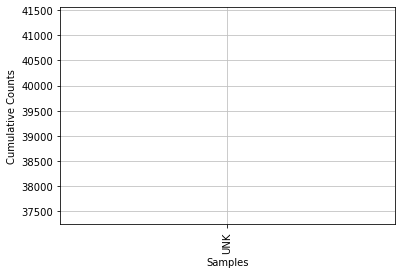

In [53]:
tag_fd.plot(cumulative=True)

<b> Noun

In [56]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']
fdist = nltk.FreqDist(noun_preceders)
[tag for (tag, _) in fdist.most_common()]

    

[]

In [55]:
wsj = nltk.corpus.treebank.tagged_words(tagset="Universal") 
word_tag_fd = nltk.FreqDist(wsj) 
[word + "/" + tag for (word, tag) in word_tag_fd if tag.startswith('V')] 

[]

In [38]:
cfd1 = nltk.ConditionalFreqDist(wsj) 
cfd1['yield'].keys() 
cfd1['cut'].keys() 

dict_keys(['UNK'])

<b> Exploring Tagged Corpora

In [59]:
brown_learned_text = brown.words(categories='learned')
sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often'))

[',',
 '.',
 'accomplished',
 'analytically',
 'appear',
 'apt',
 'associated',
 'assuming',
 'became',
 'become',
 'been',
 'began',
 'call',
 'called',
 'carefully',
 'chose',
 'classified',
 'colorful',
 'composed',
 'contain',
 'differed',
 'difficult',
 'encountered',
 'enough',
 'equate',
 'extremely',
 'found',
 'happens',
 'have',
 'ignored',
 'in',
 'involved',
 'more',
 'needed',
 'nightly',
 'observed',
 'of',
 'on',
 'out',
 'quite',
 'represent',
 'responsible',
 'revamped',
 'seclude',
 'set',
 'shortened',
 'sing',
 'sounded',
 'stated',
 'still',
 'sung',
 'supported',
 'than',
 'to',
 'when',
 'work']

In [60]:
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


<b> Searching for Three-Word Phrases Using POS Tags

In [63]:
from nltk.corpus import brown
def process(sentence):
    for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence): 
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')): 
            print(w1, w2, w3) 
            
for tagged_sent in brown.tagged_sents():
     process(tagged_sent)


combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
designed to provide
get to hear
expects to tell
expected to give
prefer to pay
required to obtain
permitted to teach
designed to reduce
Asked to elaborate
got to go
raised to pay
scheduled to go
cut to meet
needed to meet
hastened to add
found to prevent
continue to insist
compelled to make
made to remove
revamped to give
want to risk
appear to spark
fails to consider
plans to call
going to examine
plans to name
come to pass
voted to accept
happens to hold
authorized to adopt
hesitated to prosecute
try to make
decided to spend
taken to preserve
left to preserve
stand to bring
decided to seek
trying to induce
proposing to make
decided to run
directed to investigate
expected to pass
expected to make
expected to encounter
hopes to pass
came to pay
expected to receive
understood to follow
wanted to vote
decide

wish to advocate
expect to see
refuse to aid
needs to stand
strives to emulate
refusing to show
seems to match
decided to rake
entitled to stay
bringing to bear
beginning to get
threaten to use
begin to play
begin to hunt
induced to see
going to hang
continue to test
choose to agree
chosen to find
compelled to conduct
need to realize
used to justify
fail to respond
intends to economize
bound to say
trying to mollify
used to say
came to reassert
choose to call
intend to re-enter
conscripted to enact
continues to feed
tried to integrate
poised to strike
try to force
attempting to reach
afford to take
forbidden to sit
plans to import
likes to imagine
used to get
trying to make
ceased to suggest
going to work
wanting to cut
choose to persuade
trying to keep
like to embark
suited to defeat
hastened to put
like to add
want to preserve
required to participate
happened to save
doing to promote
tempted to quote
continuing to capture
need to communicate
like to see
interested to know
allowed to 

hoping to see
got to know
paused to comfort
hesitate to quote
decided to see
wanted to take
need to know
need to look
beginning to protrude
try to speak
decides to proceed
interested to hear
seems to probe
preferring to consider
known to go
amazed to realize
seeking to help
interpreted to conform
explored to find
trying to throw
designed to find
required to mark
asked to consider
seem to involve
seems to smell
seems to see
learned to develop
arranged to meet
need to work
want to raise
need to bring
expect to grow
expected to work
want to include
going to produce
want to hire
want to buy
want to hire
going to farm
need to know
want to undertake
want to buy
wish to locate
plan to sell
want to go
intend to raise
cost to live
expected to produce
expect to get
forced to lay
trying to explain
happened to light
began to turn
intended to warn
used to transform
forced to overcome
begins to give
failed to post
refused to permit
encouraged to beget
obliged to obey
united to push
try to oppose
mad

needed to explain
required to make
sought to make
accustomed to think
come to look
undertook to give
came to study
bound to go
tried to dazzle
got to know
presumed to address
obliged to defend
coming to spend
learned to write
obliged to send
began to trail
began to fly
tried to calm
inspired to complete
began to talk
compelled to spend
expected to carry
tend to make
liked to think
trying to emulate
wanted to know
seemed to remember
asked to yield
made to look
begun to lose
failed to learn
wanted to take
writing to devote
vowed to kneel
hoping to lift
forced to seek
continue to urge
prepared to assist
hope to make
continue to maintain
scheduled to go
taken to program
begun to probe
attempting to present
instructed to burn
attempted to conclude
equipped to handle
trying to check
mean to write
wished to pursue
refused to attend
decided to dance
failed to amaze
continued to search
threatening to swallow
pleased to see
tried to discover
disturbed to find
failed to realize
manage to get
want

came to work
decided to bring
found to permit
helping to strengthen
began to ship
believed to provide
designed to provide
expect to make
developed to facilitate
set to hold
continuing to carry
designed to increase
improved to obtain
purchased to permit
extended to provide
sought to meet
designed to handle
invited to participate
planned to provide
inclined to advance
aims to give
wish to pursue
expected to increase
expected to exceed
begun to make
continues to expand
began to make
need to learn
learn to delegate
working to attain
begun to translate
besieged to serve
help to create
assumed to originate
used to describe
expected to cause
taken to study
required to ensure
used to measure
used to start
started to strike
allowed to pull
used to measure
generalized to include
eliminated to obtain
extended to include
used to derive
adjusted to minimize
required to make
taken to prevent
attempts to present
evaporate to leave
tend to stick
helps to float
acts to remove
tend to accelerate
appear 

led to postulate
hope to discover
tended to emphasize
fails to explore
seeks to make
helping to define
trying to avoid
trying to get
made to symbolize
kneels to kiss
serve to travesty
used to equate
altered to show
altered to show
taken to branch
attempt to execute
used to name
used to name
used to generate
used to select
used to select
used to specify
used to specify
expected to serve
used to eliminate
designed to handle
made to take
tended to float
began to decrease
began to build
used to provide
tend to ensure
seems to strive
stated to emphasize
channeled to produce
expected to replace
developed to attack
needed to translate
needed to make
used to deny
required to localize
found to protect
used to demonstrate
shown to undergo
extended to include
shown to undergo
allowed to go
used to classify
found to keep
made to group
continued to supply
serves to inactivate
needed to inactivate
thought to offer
serves to extend
served to extend
required to accomplish
found to compare
required to 

stopping to hear
want to talk
going to cost
wanted to ask
going to get
going to swear
tried to keep
think to look
tried to find
bear to hold
began to pace
tried to tell
intended to scare
began to think
hired to take
going to send
helped to create
wanted to give
led to believe
trying to escape
began to thrash
get to work
come to work
want to see
wanted to get
want to go
managed to swallow
threatened to fire
happen to see
going to eat
began to weep
happens to ask
want to rent
Try to imagine
promised to pay
planning to remarry
determined to get
seemed to swell
surprised to meet
trying to tell
known to run
seem to preserve
got to understand
got to know
came to ask
asked to see
began to abuse
hurry to hang
seemed to mind
started to cross
started to curse
offering to buy
began to feel
seem to wink
continued to stare
beginning to feel
like to listen
want to study
relieved to see
seemed to notice
decided to stay
startled to see
began to feel
bothered to ask
beginning to take
began to wish
want

obliged to roll
want to stop
going to marry
liked to hear
tempted to tell
seemed to mark
tried to explain
managed to look
needed to get
answered to find
afford to get
started to look
takes to get
going to get
tried to quiet
trying to sound
came to meet
seemed to focus
want to talk
want to see
wants to get
went to turn
surprised to find
want to stay
going to make
hoped to dig
trying to make
going to lug
surprised to see
stop to read
intended to move
rising to sting
arranged to live
managed to find
inclined to wobble
supposed to care
shuddered to think
seemed to understand
aroused to go
hate to call
wish to leave
seemed to follow
supposed to matter
bothered to tell
hesitate to use
used to say
try to persuade
wanted to keep
trying to keep
blushed to admit
want to continue
chosen to represent
want to leave
wanted to work
seemed to regard
forbore to mention
managed to open
want to encourage
want to watch
remember to warn
used to take
want to use
started to throw
began to swing
started to ca

In [64]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag)
                                for (word, tag) in brown_news_tagged)


for word in sorted(data.conditions()):
     if len(data[word]) > 3:
        tags = [tag for (tag, _) in data[word].most_common()]
        print(word, ' '.join(tags))
                                

best ADJ ADV VERB NOUN
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


<b> Mapping Words to Properties Using Python Dictionaries

Once we start doing part-of-speech tagging, we will be creating programs that assign a tag to a word, the tag which is most likely in a given context. We can think of this process as mapping from words to tags. The most natural way to store mappings in Python uses the so-called dictionary data type (also known as an associative array or hash array in other programming languages). 

<b>Indexing Lists vs Dictionaries

In [65]:
pos={}

In [66]:
pos

{}

In [67]:
pos['colorless'] = 'ADJ'

In [68]:
pos


{'colorless': 'ADJ'}

In [69]:
pos['ideas'] = 'N'
pos['sleep'] = 'V'
pos['furiously'] = 'ADV'
pos

{'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

In [70]:
pos['ideas']

'N'

In [71]:
pos['colorless']


'ADJ'

In [72]:
list(pos)

['colorless', 'ideas', 'sleep', 'furiously']

In [73]:
sorted(pos) 

['colorless', 'furiously', 'ideas', 'sleep']

In [74]:
[w for w in pos if w.endswith('s')]

['colorless', 'ideas']

In [75]:
for word in sorted(pos):
     print(word + ":", pos[word])

colorless: ADJ
furiously: ADV
ideas: N
sleep: V


In [76]:
list(pos.keys())

['colorless', 'ideas', 'sleep', 'furiously']

In [77]:
list(pos.values())

['ADJ', 'N', 'V', 'ADV']

In [78]:
list(pos.items())

[('colorless', 'ADJ'), ('ideas', 'N'), ('sleep', 'V'), ('furiously', 'ADV')]

In [81]:
for key, val in sorted(pos.items()): 
     print(key + ":", val)

colorless: ADJ
furiously: ADV
ideas: N
sleep: V


In [83]:
pos['sleep'] = 'V'
pos['sleep']

'V'

<b> Defining Dictionaries

In [84]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

In [85]:
pos

{'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

In [86]:
#other way
pos1=dict(colorless='ADJ', ideas='N', sleep='V', furiously='ADV')
pos1

{'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

<b> Default Dictionaries

If we try to access a key that is not in a dictionary, we get an error. However, its often useful if a dictionary can automatically create an entry for this new key and give it a default value, such as zero or the empty list. For this reason, a special kind of dictionary called a defaultdict is available. In order to use it, we have to supply a parameter which can be used to create the default value, e.g. int, float, str, list, dict, tuple.



In [87]:
from collections import defaultdict
frequency = defaultdict(int)
frequency['colorless'] = 4
frequency['ideas']

0

In [88]:
pos = defaultdict(list)
pos['sleep'] = ['NOUN', 'VERB']
pos['ideas']

[]

These default values are actually functions that convert other objects to the specified type (e.g. int("2"), list("2")). When they are called with no parameter — int(), list() — they return 0 and [] respectively.

In [89]:
pos = defaultdict(lambda: 'NOUN') 
pos['colorless'] = 'ADJ'
pos['blog'] 


'NOUN'

In [90]:
list(pos.items())

[('colorless', 'ADJ'), ('blog', 'NOUN')]

In [91]:
f = lambda: 'NOUN'

In [92]:
f()

'NOUN'

In [93]:
def g():
     return 'NOUN'
    
g()

'NOUN'

In [94]:
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
vocab = nltk.FreqDist(alice)
v1000 = [word for (word, _) in vocab.most_common(1000)]
mapping = defaultdict(lambda: 'UNK')
for v in v1000:
     mapping[v] = v

In [95]:
alice2 = [mapping[v] for v in alice]

In [97]:
 alice2[:10]

['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'UNK', 'UNK']

In [98]:
len(set(alice2))

1001

<b> Incrementally Updating a Dictionary

In [99]:
from collections import defaultdict

counts = defaultdict(int)
from nltk.corpus import brown
for (word, tag) in brown.tagged_words(categories='news', tagset='universal'):
     counts[tag] += 1

In [100]:
counts['NOUN']

30654

In [101]:
sorted(counts)

['.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X']

In [102]:
from operator import itemgetter

In [103]:
sorted(counts.items(), key=itemgetter(1), reverse=True)

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

In [104]:
[t for t, c in sorted(counts.items(), key=itemgetter(1), reverse=True)]

['NOUN',
 'VERB',
 'ADP',
 '.',
 'DET',
 'ADJ',
 'ADV',
 'CONJ',
 'PRON',
 'PRT',
 'NUM',
 'X']

 The first parameter of sorted() is the items to sort, a list of tuples consisting of a POS tag and a frequency. The second parameter specifies the sort key using a function itemgetter(). In general, itemgetter(n) returns a function that can be called on some other sequence object to obtain the nth element

In [106]:
pair = ('NP', 8336)
pair[1]

8336

In [107]:
itemgetter(1)(pair)

8336

In [108]:
last_letters = defaultdict(list)
words = nltk.corpus.words.words('en')
for word in words:
    key = word[-2:]
    last_letters[key].append(word)
    



In [109]:
last_letters['ly']

['abactinally',
 'abandonedly',
 'abasedly',
 'abashedly',
 'abashlessly',
 'abbreviately',
 'abdominally',
 'abhorrently',
 'abidingly',
 'abiogenetically',
 'abiologically',
 'abjectly',
 'ableptically',
 'ably',
 'abnormally',
 'abominably',
 'aborally',
 'aboriginally',
 'abortively',
 'aboundingly',
 'abridgedly',
 'abruptedly',
 'abruptly',
 'abscondedly',
 'absently',
 'absentmindedly',
 'absolutely',
 'absolutistically',
 'absorbedly',
 'absorbingly',
 'absorptively',
 'abstemiously',
 'abstinently',
 'abstractedly',
 'abstractively',
 'abstractly',
 'abstrusely',
 'absurdly',
 'abundantly',
 'abusedly',
 'abusefully',
 'abusively',
 'abysmally',
 'academically',
 'acceleratedly',
 'accentually',
 'acceptably',
 'acceptedly',
 'accessarily',
 'accessibly',
 'accessively',
 'accessorily',
 'accidentally',
 'accidently',
 'accommodately',
 'accommodatingly',
 'accordantly',
 'accordingly',
 'accountably',
 'accumulatively',
 'accurately',
 'accursedly',
 'accusably',
 'accusative

In [110]:
last_letters['zy']

['blazy',
 'bleezy',
 'blowzy',
 'boozy',
 'breezy',
 'bronzy',
 'buzzy',
 'Chazy',
 'cozy',
 'crazy',
 'dazy',
 'dizzy',
 'dozy',
 'enfrenzy',
 'fezzy',
 'fizzy',
 'floozy',
 'fozy',
 'franzy',
 'frenzy',
 'friezy',
 'frizzy',
 'frowzy',
 'furzy',
 'fuzzy',
 'gauzy',
 'gazy',
 'glazy',
 'groszy',
 'hazy',
 'heezy',
 'Izzy',
 'jazzy',
 'Jozy',
 'lawzy',
 'lazy',
 'mazy',
 'mizzy',
 'muzzy',
 'nizy',
 'oozy',
 'quartzy',
 'quizzy',
 'refrenzy',
 'ritzy',
 'Shortzy',
 'sizy',
 'sleazy',
 'sneezy',
 'snoozy',
 'squeezy',
 'Suzy',
 'tanzy',
 'tizzy',
 'topazy',
 'trotcozy',
 'twazzy',
 'unbreezy',
 'unfrizzy',
 'wheezy',
 'woozy',
 'wuzzy',
 'yezzy']

<b> creating an anagram dictionary

In [112]:
anagrams = defaultdict(list)

for word in words:
    key = ''.join(sorted(word))
    anagrams[key].append(word)
    


In [113]:
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

Since accumulating words like this is such a common task, NLTK provides a more convenient way of creating a defaultdict(list), in the form of nltk.Index().

In [116]:
anagrams = nltk.Index((''.join(sorted(w)), w) for w in words)
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

nltk.Index is a defaultdict(list) with extra support for initialization. Similarly, nltk.FreqDist is essentially a defaultdict(int) with extra support for initialization (along with sorting and plotting methods).

<b> Complex Keys and Values

In [120]:
pos = defaultdict(lambda: defaultdict(int))

In [121]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')

In [122]:
for ((w1, t1), (w2, t2)) in nltk.bigrams(brown_news_tagged):
    pos[(t1, w2)][t2] += 1 

In [123]:
pos[('DET', 'right')]

defaultdict(int, {'NOUN': 5, 'ADJ': 11})

<b>  Inverting a Dictionary

In [124]:
counts = defaultdict(int)


In [125]:
for word in nltk.corpus.gutenberg.words('milton-paradise.txt'):
    counts[word] += 1

In [126]:
[key for (key, value) in counts.items() if value == 32]

['mortal',
 'Against',
 'Him',
 'There',
 'brought',
 'King',
 'virtue',
 'every',
 'been',
 'thine']

In [127]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

In [128]:
pos2 = dict((value, key) for (key, value) in pos.items())

In [129]:
pos2['N']

'ideas'

In [130]:
pos.update({'cats': 'N', 'scratch': 'V', 'peacefully': 'ADV', 'old': 'ADJ'})

In [131]:
pos2 = defaultdict(list)

In [132]:
for key, value in pos.items():
    pos2[value].append(key)

In [133]:
pos2['ADV']

['furiously', 'peacefully']

In [134]:
pos2 = nltk.Index((value, key) for (key, value) in pos.items())

In [135]:
pos2['ADV']

['furiously', 'peacefully']

<b> Automatic Tagging

In [137]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

<b> The Default Tagger

In [139]:
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

'NN'

In [140]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [141]:
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

<b> The Regular Expression Tagger

The regular expression tagger assigns tags to tokens on the basis of matching patterns. For instance, we might guess that any word ending in ed is the past participle of a verb, and any word ending with 's is a possessive noun. We can express these as a list of regular expressions:

In [142]:
 patterns = [
     (r'.*ing$', 'VBG'),                # gerunds
     (r'.*ed$', 'VBD'),                 # simple past
     (r'.*es$', 'VBZ'),                 # 3rd singular present
     (r'.*ould$', 'MD'),                # modals
     (r'.*\'s$', 'NN$'),                # possessive nouns
     (r'.*s$', 'NNS'),                  # plural nouns
     (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
     (r'.*', 'NN')                      # nouns (default)
 ]

In [143]:
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [144]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20186168625812995

<b> The Lookup Tagger

A lot of high-frequency words do not have the NN tag. Let's find the hundred most frequent words and store their most likely tag. We can then use this information as the model for a "lookup tagger" (an NLTK UnigramTagger):

In [145]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

In [146]:
sent = brown.sents(categories='news')[3]
baseline_tagger.tag(sent)

[('``', '``'),
 ('Only', None),
 ('a', 'AT'),
 ('relative', None),
 ('handful', None),
 ('of', 'IN'),
 ('such', None),
 ('reports', None),
 ('was', 'BEDZ'),
 ('received', None),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', None),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', None),
 ('the', 'AT'),
 ('widespread', None),
 ('interest', None),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', None),
 (',', ','),
 ('the', 'AT'),
 ('number', None),
 ('of', 'IN'),
 ('voters', None),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', None),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', None),
 ("''", "''"),
 ('.', '.')]

In [147]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags,
                                     backoff=nltk.DefaultTagger('NN'))

<b> Lookup Tagger Performance with Varying Model Size

In [148]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

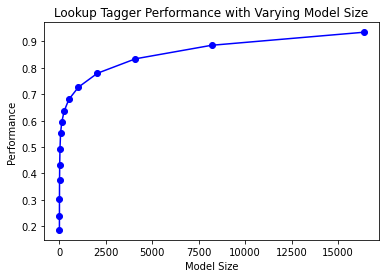

In [149]:
display()

<b> N-Gram Tagging

Unigram taggers are based on a simple statistical algorithm: for each token, assign the tag that is most likely for that particular token. For example, it will assign the tag JJ to any occurrence of the word frequent, since frequent is used as an adjective (e.g. a frequent word) more often than it is used as a verb (e.g. I frequent this cafe). A unigram tagger behaves just like a lookup tagger (4), except there is a more convenient technique for setting it up, called training. In the following code sample, we train a unigram tagger, use it to tag a sentence, then evaluate:

In [150]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [151]:
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

<b> Separating the Training and Testing Data

Now that we are training a tagger on some data, we must be careful not to test it on the same data, as we did in the above example. A tagger that simply memorized its training data and made no attempt to construct a general model would get a perfect score, but would also be useless for tagging new text. Instead, we should split the data, training on 90% and testing on the remaining 10%:

In [152]:
size = int(len(brown_tagged_sents) * 0.9)
size

4160

In [153]:
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8121200039868434

<b> General N-Gram Tagging </b>

When we perform a language processing task based on unigrams, we are using one item of context. In the case of tagging, we only consider the current token, in isolation from any larger context. Given such a model, the best we can do is tag each word with its a priori most likely tag. This means we would tag a word such as wind with the same tag, regardless of whether it appears in the context the wind or to wind.

An n-gram tagger is a generalization of a unigram tagger whose context is the current word together with the part-of-speech tags of the n-1 preceding tokens.

In [154]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [155]:
unseen_sent = brown_sents[4203]
bigram_tagger.tag(unseen_sent)

[('The', 'AT'),
 ('population', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('Congo', 'NP'),
 ('is', 'BEZ'),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

In [156]:
bigram_tagger.evaluate(test_sents)

0.10206319146815508

<b> Combining Taggers

One way to address the trade-off between accuracy and coverage is to use the more accurate algorithms when we can, but to fall back on algorithms with wider coverage when necessary. For example, we could combine the results of a bigram tagger, a unigram tagger, and a default tagger, as follows:

Try tagging the token with the bigram tagger.

If the bigram tagger is unable to find a tag for the token, try the unigram tagger.

If the unigram tagger is also unable to find a tag, use a default tagger.

Most NLTK taggers permit a backoff-tagger to be specified. The backoff-tagger may itself have a backoff tagge

In [157]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.8452108043456593

<b> Storing Taggers

Training a tagger on a large corpus may take a significant time. Instead of training a tagger every time we need one, it is convenient to save a trained tagger in a file for later re-use. Let's save our tagger t2 to a file t2.pkl.

In [158]:
from pickle import dump
output = open('t2.pkl', 'wb')
dump(t2, output, -1)
output.close()

 In a separate Python process, we can load our saved tagger:

In [159]:
from pickle import load
input = open('t2.pkl', 'rb')
tagger = load(input)
input.close()

In [160]:
text = """The board's action shows what free enterprise
    is up against in our complex maze of regulatory laws ."""
tokens = text.split()
tagger.tag(tokens)

[('The', 'AT'),
 ("board's", 'NN$'),
 ('action', 'NN'),
 ('shows', 'NNS'),
 ('what', 'WDT'),
 ('free', 'JJ'),
 ('enterprise', 'NN'),
 ('is', 'BEZ'),
 ('up', 'RP'),
 ('against', 'IN'),
 ('in', 'IN'),
 ('our', 'PP$'),
 ('complex', 'JJ'),
 ('maze', 'NN'),
 ('of', 'IN'),
 ('regulatory', 'NN'),
 ('laws', 'NNS'),
 ('.', '.')]

<b> Performance Limitations

What is the upper limit to the performance of an n-gram tagger? Consider the case of a trigram tagger. How many cases of part-of-speech ambiguity does it encounter? 

<b> Empirically:

In [161]:
cfd = nltk.ConditionalFreqDist(
            ((x[1], y[1], z[0]), z[1])
            for sent in brown_tagged_sents
            for x, y, z in nltk.trigrams(sent))

In [162]:
ambiguous_contexts = [c for c in cfd.conditions() if len(cfd[c]) > 1]

In [163]:
sum(cfd[c].N() for c in ambiguous_contexts) / cfd.N()

0.049297702068029296

Another way to investigate the performance of a tagger is to study its mistakes. Some tags may be harder than others to assign, and it might be possible to treat them specially by pre- or post-processing the data. A convenient way to look at tagging errors is the <b> confusion matrix </b>. It charts expected tags (the gold standard) against actual tags generated by a tagger:

In [164]:
test_tags = [tag for sent in brown.sents(categories='editorial')
                 for (word, tag) in t2.tag(sent)]

In [165]:
gold_tags = [tag for (word, tag) in brown.tagged_words(categories='editorial')]

In [166]:
print(nltk.ConfusionMatrix(gold_tags, test_tags))   

           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

<b> Transformation-Based Tagging

Brill taggers have another interesting property: the rules are linguistically interpretable.

In [167]:
from nltk.tbl import demo as brill_demo
brill_demo.demo()

Loading tagged data from treebank... 
Read testing data (200 sents/5251 wds)
Read training data (800 sents/19933 wds)
Read baseline data (800 sents/19933 wds) [reused the training set]
Trained baseline tagger
    Accuracy on test set: 0.8366
Training tbl tagger...
TBL train (fast) (seqs: 800; tokens: 19933; tpls: 24; min score: 3; min acc: None)
Finding initial useful rules...
    Found 12799 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  23  23   0   0  | POS->VBZ if Pos:PRP@[-2,-1]
  18  19   1   0  | NN->VB if Pos:-NONE-@[-2] & Pos:TO@[-1]
  14  14   0   0  | VBP->VB if Pos:MD@[-2,-1]
  12  12   0   0  | VBP->VB if Pos:TO@[-1]
  